In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from sklearn.metrics import classification_report
from keras.callbacks import Callback
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

Using TensorFlow backend.


In [2]:
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

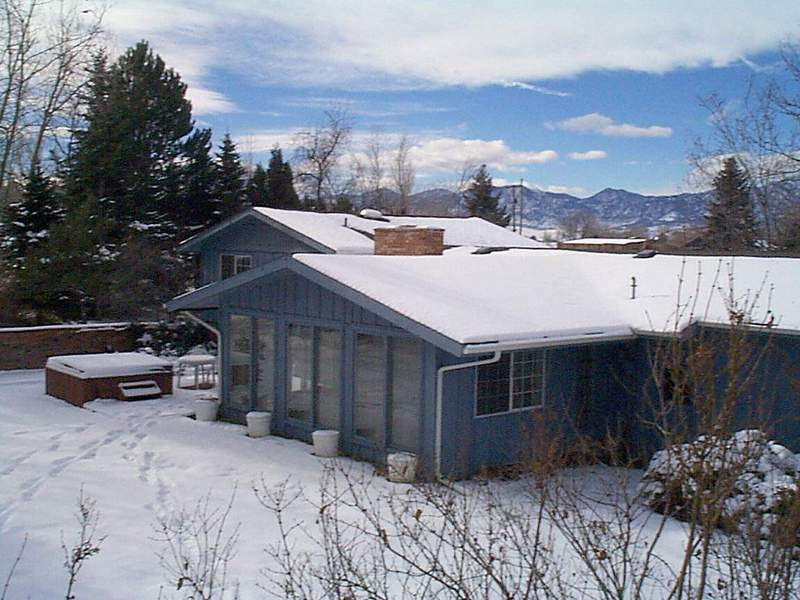

In [13]:
Image.open('datasets/dataset-v1/casia/CASIA2/Au/Au_arc_10121.bmp')

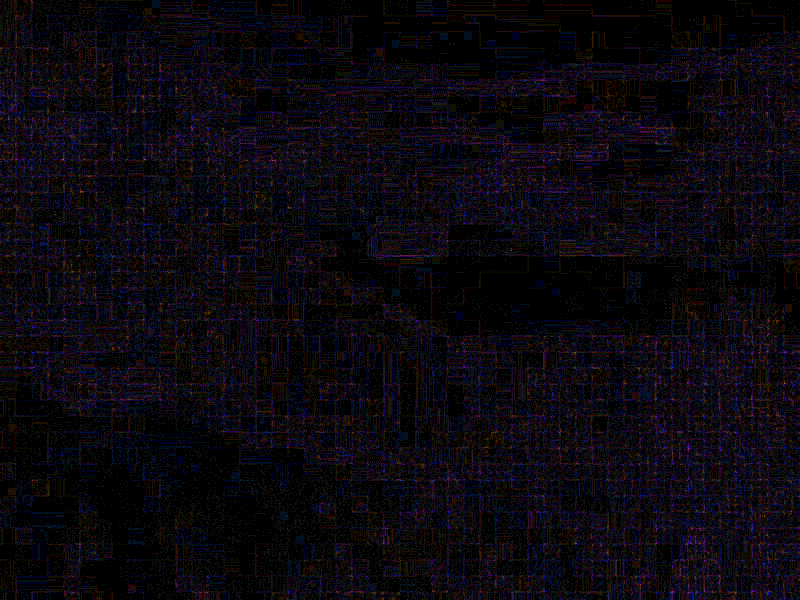

In [18]:
convert_to_ela_image('datasets/dataset-v1/casia/CASIA2/Au/Au_arc_10121.bmp', 90)

In [3]:
dataset = pd.read_csv('datasets/dataset-v2/real_and_fake_face/real-fake-dataset.csv')

In [4]:
X = []
Y = []

In [5]:
count = 0
for index, row in dataset.iterrows():
    if count == 10000:
        break
    if os.path.isfile(row[0]):
        X.append(array(convert_to_ela_image(row[0], 90).resize((128, 128))).flatten() / 255.0)
        Y.append(row[1])
        count += 1
        print('done: '+str(count))
print("==== FINISHED ====")

done: 1
done: 2
done: 3
done: 4
done: 5
done: 6
done: 7
done: 8
done: 9
done: 10
done: 11
done: 12
done: 13
done: 14
done: 15
done: 16
done: 17
done: 18
done: 19
done: 20
done: 21
done: 22
done: 23
done: 24
done: 25
done: 26
done: 27
done: 28
done: 29
done: 30
done: 31
done: 32
done: 33
done: 34
done: 35
done: 36
done: 37
done: 38
done: 39
done: 40
done: 41
done: 42
done: 43
done: 44
done: 45
done: 46
done: 47
done: 48
done: 49
done: 50
done: 51
done: 52
done: 53
done: 54
done: 55
done: 56
done: 57
done: 58
done: 59
done: 60
done: 61
done: 62
done: 63
done: 64
done: 65
done: 66
done: 67
done: 68
done: 69
done: 70
done: 71
done: 72
done: 73
done: 74
done: 75
done: 76
done: 77
done: 78
done: 79
done: 80
done: 81
done: 82
done: 83
done: 84
done: 85
done: 86
done: 87
done: 88
done: 89
done: 90
done: 91
done: 92
done: 93
done: 94
done: 95
done: 96
done: 97
done: 98
done: 99
done: 100
done: 101
done: 102
done: 103
done: 104
done: 105
done: 106
done: 107
done: 108
done: 109
done: 110
done: 11

done: 833
done: 834
done: 835
done: 836
done: 837
done: 838
done: 839
done: 840
done: 841
done: 842
done: 843
done: 844
done: 845
done: 846
done: 847
done: 848
done: 849
done: 850
done: 851
done: 852
done: 853
done: 854
done: 855
done: 856
done: 857
done: 858
done: 859
done: 860
done: 861
done: 862
done: 863
done: 864
done: 865
done: 866
done: 867
done: 868
done: 869
done: 870
done: 871
done: 872
done: 873
done: 874
done: 875
done: 876
done: 877
done: 878
done: 879
done: 880
done: 881
done: 882
done: 883
done: 884
done: 885
done: 886
done: 887
done: 888
done: 889
done: 890
done: 891
done: 892
done: 893
done: 894
done: 895
done: 896
done: 897
done: 898
done: 899
done: 900
done: 901
done: 902
done: 903
done: 904
done: 905
done: 906
done: 907
done: 908
done: 909
done: 910
done: 911
done: 912
done: 913
done: 914
done: 915
done: 916
done: 917
done: 918
done: 919
done: 920
done: 921
done: 922
done: 923
done: 924
done: 925
done: 926
done: 927
done: 928
done: 929
done: 930
done: 931
done: 932


done: 1593
done: 1594
done: 1595
done: 1596
done: 1597
done: 1598
done: 1599
done: 1600
done: 1601
done: 1602
done: 1603
done: 1604
done: 1605
done: 1606
done: 1607
done: 1608
done: 1609
done: 1610
done: 1611
done: 1612
done: 1613
done: 1614
done: 1615
done: 1616
done: 1617
done: 1618
done: 1619
done: 1620
done: 1621
done: 1622
done: 1623
done: 1624
done: 1625
done: 1626
done: 1627
done: 1628
done: 1629
done: 1630
done: 1631
done: 1632
done: 1633
done: 1634
done: 1635
done: 1636
done: 1637
done: 1638
done: 1639
done: 1640
done: 1641
done: 1642
done: 1643
done: 1644
done: 1645
done: 1646
done: 1647
done: 1648
done: 1649
done: 1650
done: 1651
done: 1652
done: 1653
done: 1654
done: 1655
done: 1656
done: 1657
done: 1658
done: 1659
done: 1660
done: 1661
done: 1662
done: 1663
done: 1664
done: 1665
done: 1666
done: 1667
done: 1668
done: 1669
done: 1670
done: 1671
done: 1672
done: 1673
done: 1674
done: 1675
done: 1676
done: 1677
done: 1678
done: 1679
done: 1680
done: 1681
done: 1682
done: 1683

done: 2339
done: 2340
done: 2341
done: 2342
done: 2343
done: 2344
done: 2345
done: 2346
done: 2347
done: 2348
done: 2349
done: 2350
done: 2351
done: 2352
done: 2353
done: 2354
done: 2355
done: 2356
done: 2357
done: 2358
done: 2359
done: 2360
done: 2361
done: 2362
done: 2363
done: 2364
done: 2365
done: 2366
done: 2367
done: 2368
done: 2369
done: 2370
done: 2371
done: 2372
done: 2373
done: 2374
done: 2375
done: 2376
done: 2377
done: 2378
done: 2379
done: 2380
done: 2381
done: 2382
done: 2383
done: 2384
done: 2385
done: 2386
done: 2387
done: 2388
done: 2389
done: 2390
done: 2391
done: 2392
done: 2393
done: 2394
done: 2395
done: 2396
done: 2397
done: 2398
done: 2399
done: 2400
done: 2401
done: 2402
done: 2403
done: 2404
done: 2405
done: 2406
done: 2407
done: 2408
done: 2409
done: 2410
done: 2411
done: 2412
done: 2413
done: 2414
done: 2415
done: 2416
done: 2417
done: 2418
done: 2419
done: 2420
done: 2421
done: 2422
done: 2423
done: 2424
done: 2425
done: 2426
done: 2427
done: 2428
done: 2429

done: 3084
done: 3085
done: 3086
done: 3087
done: 3088
done: 3089
done: 3090
done: 3091
done: 3092
done: 3093
done: 3094
done: 3095
done: 3096
done: 3097
done: 3098
done: 3099
done: 3100
done: 3101
done: 3102
done: 3103
done: 3104
done: 3105
done: 3106
done: 3107
done: 3108
done: 3109
done: 3110
done: 3111
done: 3112
done: 3113
done: 3114
done: 3115
done: 3116
done: 3117
done: 3118
done: 3119
done: 3120
done: 3121
done: 3122
done: 3123
done: 3124
done: 3125
done: 3126
done: 3127
done: 3128
done: 3129
done: 3130
done: 3131
done: 3132
done: 3133
done: 3134
done: 3135
done: 3136
done: 3137
done: 3138
done: 3139
done: 3140
done: 3141
done: 3142
done: 3143
done: 3144
done: 3145
done: 3146
done: 3147
done: 3148
done: 3149
done: 3150
done: 3151
done: 3152
done: 3153
done: 3154
done: 3155
done: 3156
done: 3157
done: 3158
done: 3159
done: 3160
done: 3161
done: 3162
done: 3163
done: 3164
done: 3165
done: 3166
done: 3167
done: 3168
done: 3169
done: 3170
done: 3171
done: 3172
done: 3173
done: 3174

In [6]:
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [8]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu', input_shape = (128,128,3)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

Input:  (None, 128, 128, 3)
Output:  (None, 124, 124, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 58, 58, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 29, 29, 32)


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [10]:
optimizer = RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)

In [11]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [12]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              verbose=1, mode='auto')

In [13]:
epochs = 30
batch_size = 100

In [14]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 1)

Train on 2861 samples, validate on 716 samples
Epoch 1/30
2861/2861 [==============================] - 83s 29ms/step - loss: 0.5475 - accuracy: 0.6949 - val_loss: 0.5662 - val_accuracy: 0.6927
Epoch 2/30
2861/2861 [==============================] - 82s 29ms/step - loss: 0.4632 - accuracy: 0.7309 - val_loss: 0.4335 - val_accuracy: 0.7430
Epoch 3/30
2861/2861 [==============================] - 81s 28ms/step - loss: 0.4412 - accuracy: 0.7396 - val_loss: 0.4258 - val_accuracy: 0.7528
Epoch 4/30
2861/2861 [==============================] - 82s 29ms/step - loss: 0.4222 - accuracy: 0.7623 - val_loss: 0.6097 - val_accuracy: 0.5992
Epoch 5/30
2861/2861 [==============================] - 78s 27ms/step - loss: 0.4265 - accuracy: 0.7602 - val_loss: 0.4508 - val_accuracy: 0.7500
Epoch 6/30
2861/2861 [==============================] - 84s 29ms/step - loss: 0.4054 - accuracy: 0.7711 - val_loss: 0.4344 - val_accuracy: 0.7668
Epoch 7/30
2861/2861 [==============================] - 85s 30ms/step - loss:

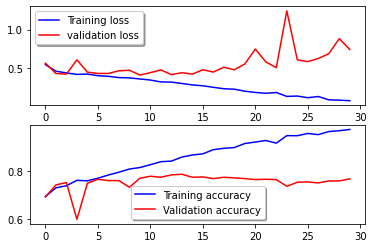

In [15]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

AKURASI:  76.81564092636108 %


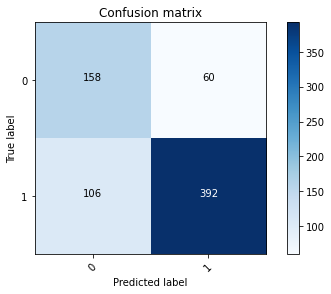

In [16]:
# from keras.preprocessing import image
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
score = model.evaluate(X_val, Y_val, verbose=0)
print("AKURASI: ",score[1]*100,"%")

In [17]:
model.save('saved-models/model-v3-with-real-fake-dataset.h5')

In [27]:
from keras.models import load_model
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
model = load_model('saved-models/model-v1-with-casia.h5')

In [28]:
y_pred1 = model.predict(X_val)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(Y_val, y_pred , average="macro"))
print(recall_score(Y_val, y_pred , average="macro"))
print(f1_score(Y_val, y_pred , average="macro"))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets